In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [153]:
df = pd.read_csv('twitter_training.csv')

In [154]:
df.head()

,Tweet_Id,entity,sentiment,Tweet_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [155]:
df = df.drop(['Tweet_Id'], axis =1)

In [156]:
df.isnull().sum()

entity             0
sentiment          0
Tweet_content    686
dtype: int64

In [157]:
df = df.dropna()

In [158]:
df['entity'].value_counts()

entity
MaddenNFL                            2377
LeagueOfLegends                      2377
CallOfDuty                           2376
Verizon                              2365
TomClancysRainbowSix                 2364
Facebook                             2362
Microsoft                            2361
Dota2                                2359
WorldOfCraft                         2357
ApexLegends                          2353
NBA2K                                2343
CallOfDutyBlackopsColdWar            2343
FIFA                                 2324
johnson&johnson                      2324
TomClancysGhostRecon                 2321
Battlefield                          2316
Overwatch                            2316
GrandTheftAuto(GTA)                  2293
HomeDepot                            2292
PlayStation5(PS5)                    2291
Hearthstone                          2286
CS-GO                                2284
Xbox(Xseries)                        2283
Borderlands                

EDA 

In [159]:
df['sentiment'].value_counts()

sentiment
Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64

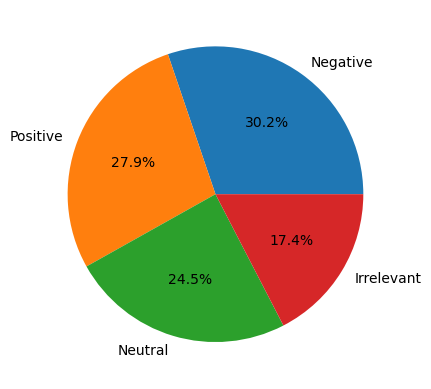

In [160]:
count = df['sentiment'].value_counts()
plt.pie(count, labels = count.index, autopct =  '%0.1f%%')
plt.show()

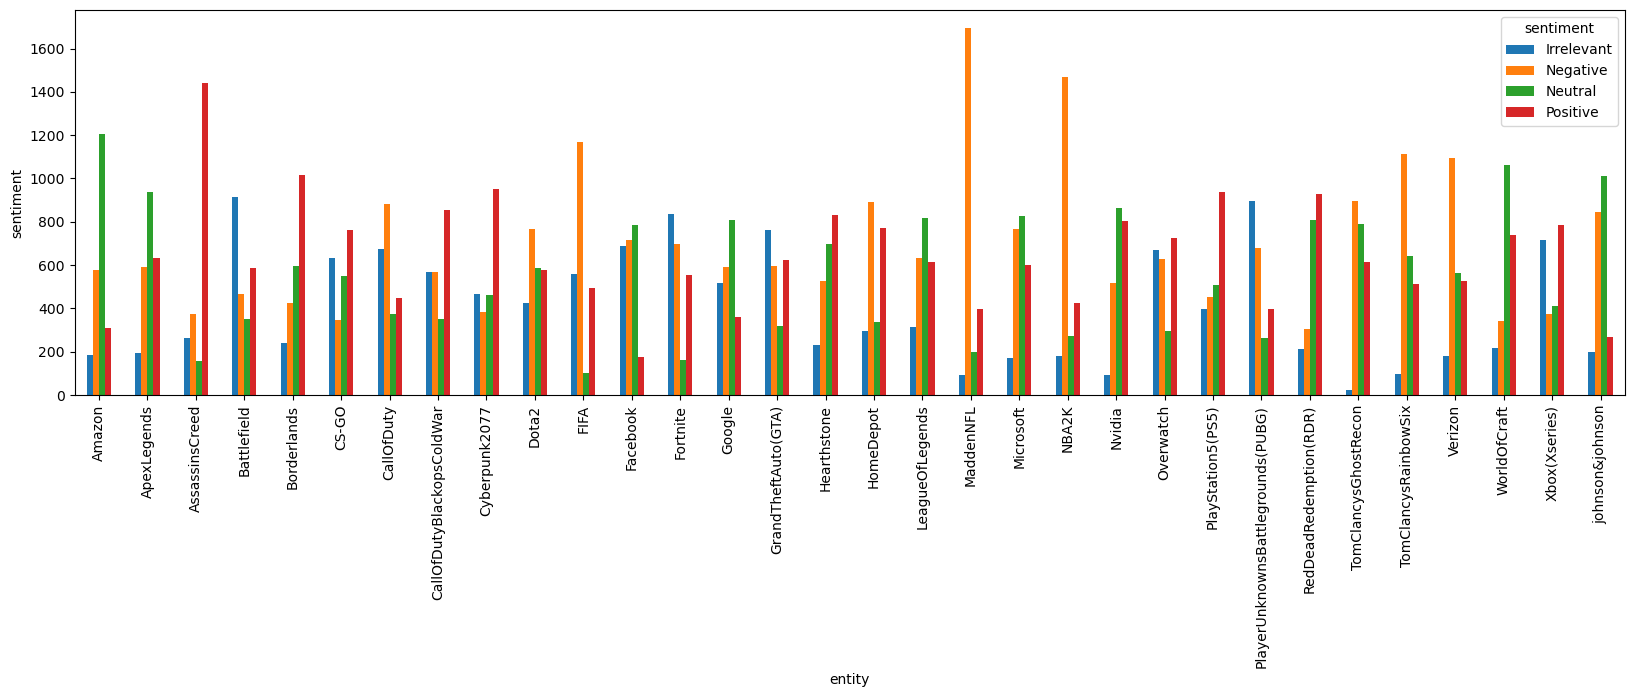

In [161]:
counts = df.groupby('entity')['sentiment'].value_counts().unstack(fill_value=0)
counts.plot(kind='bar', figsize=(20,5))
plt.xlabel('entity')
plt.ylabel('sentiment')
plt.show() 

In [162]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/pramitjana/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [163]:
df['no_of_sentences'] = df['Tweet_content'].apply(lambda x: len(nltk.sent_tokenize(x)))
df['no_of_words'] = df['Tweet_content'].apply(lambda x: len(nltk.word_tokenize(x)))

In [164]:
df.head()

,entity,sentiment,Tweet_content,no_of_sentences,no_of_words
0,Borderlands,Positive,im getting on borderlands and i will murder yo...,1,11
1,Borderlands,Positive,I am coming to the borders and I will kill you...,1,13
2,Borderlands,Positive,im getting on borderlands and i will kill you ...,1,11
3,Borderlands,Positive,im coming on borderlands and i will murder you...,1,11
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,1,13


In [165]:
df[df['sentiment']=='Positive'].describe()

,no_of_sentences,no_of_words
count,20655.000000,20655.000000
mean,1.893634,20.267151
std,1.587165,16.770681
min,0.000000,0.000000
25%,1.000000,8.000000
50%,1.000000,16.000000
75%,2.000000,28.000000
max,33.000000,198.000000


In [166]:
df[df['sentiment']=='Negative'].describe()

,no_of_sentences,no_of_words
count,22358.000000,22358.000000
mean,1.816084,23.282315
std,1.363486,17.395162
min,0.000000,0.000000
25%,1.000000,10.000000
50%,1.000000,19.000000
75%,2.000000,33.000000
max,22.000000,198.000000


Text Preprocessing

In [167]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_message(text):
    # lower case
    text = text.lower()
    
    # remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    # remove stopwords
    text = " ".join(w for w in text.split() if w not in stop_words)
    
    # stemming
    text = " ".join(ps.stem(w) for w in text.split())
    
    return text
    
df['Cleaned_Content'] = df['Tweet_content'].apply(preprocess_message)

In [168]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])

# irr-->0, neg-->1, neu-->2, pos-->3 

In [169]:
df.head()

,entity,sentiment,Tweet_content,no_of_sentences,no_of_words,Cleaned_Content
0,Borderlands,3,im getting on borderlands and i will murder yo...,1,11,im get borderland murder
1,Borderlands,3,I am coming to the borders and I will kill you...,1,13,come border kill
2,Borderlands,3,im getting on borderlands and i will kill you ...,1,11,im get borderland kill
3,Borderlands,3,im coming on borderlands and i will murder you...,1,11,im come borderland murder
4,Borderlands,3,im getting on borderlands 2 and i will murder ...,1,13,im get borderland 2 murder


most used words in negative sentiment tweets


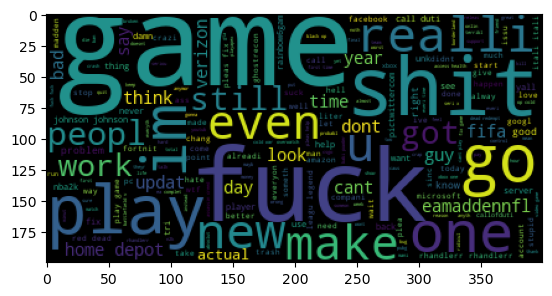

In [173]:
print('most used words in negative sentiment tweets')
from wordcloud import WordCloud
wc = WordCloud()
spam_wc = wc.generate(df[df['sentiment']==1]['Cleaned_Content'].str.cat(sep=" "))
plt.imshow(spam_wc)

Model Building & Evaluation

In [178]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
cv = CountVectorizer()
tf = TfidfVectorizer()

In [186]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [ ]:
#using count vectorizer

In [179]:
x = cv.fit_transform(df['Cleaned_Content']).toarray()
y =df['sentiment'].values

In [181]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size =0.2, random_state =42)

In [182]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

In [189]:
print("For mnb")
mnb.fit(x_train,y_train)
y_pred_mnb = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred_mnb))
print(precision_score(y_test, y_pred_mnb,average='weighted'))
print(confusion_matrix(y_test, y_pred_mnb))

For mnb
0.7189864864864864
0.7339094783258284
[[1539  508  148  501]
 [  89 3676  207  408]
 [ 150  689 2153  613]
 [ 100  553  193 3273]]


In [190]:
#using tfidf

In [195]:
x_tf = tf.fit_transform(df['Cleaned_Content']).toarray()
y_tf =df['sentiment'].values

In [196]:
from sklearn.model_selection import train_test_split
x_train_tf,x_test_tf,y_train_tf,y_test_tf = train_test_split(x_tf,y_tf, test_size =0.2, random_state =42)

In [197]:
print("For mnb")
mnb.fit(x_train_tf,y_train_tf)
y_pred_mnbtf = mnb.predict(x_test_tf)
print(accuracy_score(y_test_tf, y_pred_mnbtf))
print(precision_score(y_test_tf, y_pred_mnbtf,average='weighted'))
print(confusion_matrix(y_test_tf, y_pred_mnbtf))

For mnb
0.6889864864864865
0.7386152789136557
[[ 960  864  174  698]
 [  13 3931  130  306]
 [  25  892 2031  657]
 [  16  671  157 3275]]


From the above comparison we can see that count vectorize(or bag of words) performing well 

Testing The Algorithm

In [222]:
message = "The update ruined everything, nothing works properly anymore"

def predict_sentiment_of_message(message):
    processed_text = preprocess_message(message)      
    vector = cv.transform([processed_text])           
    prediction = mnb.predict(vector)[0]               
    
    if prediction == 0:
        return "Irrelevant"
    elif prediction == 1:
        return "Negative"
    elif prediction == 2:
        return "Neutral"
    else:
        return "Positive"

print(predict_sentiment_of_message(message))


Negative
